## Introduccion

En este notebook buscaremos implementar y mostrar el proceso mediante el cual una red neuronal aprende desde 0, a saber que elegir para ganar en el mitico
"piedra, papel o tijera".
En este, ademas iremos explicando y datallando paso a paso, por si alguien desea replicarlo.

## Inicio

Lo primero va a ser definir las opciones posibles

In [ ]:
opciones = ["piedra", "tijera", "papel"]

Ademas, tendremos que definir una funcion, que apartir de 2 opciones nos diga quien gano, sea el jugador 1 o 2, o si se dio un empate.

In [ ]:
def definir_ganador(opcion_j1, opcion_j2):
    if opcion_j1 == opcion_j2:
        return 0
    elif opcion_j1 == "piedra" and opcion_j2 == "tijera":
        return 1
    elif opcion_j1 == "tijera" and opcion_j2 == "papel":
        return 1
    elif opcion_j1 == "papel" and opcion_j2 == "piedra":
        return 1    
    elif opcion_j1 == "piedra" and opcion_j2 == "papel":
        return 2
    elif opcion_j1 == "tijera" and opcion_j2 == "piedra":
        return 2
    elif opcion_j1 == "papel" and opcion_j2 == "tijera":
        return 2

Ya tenemos la funcion de evaluacion, la probamos un poquito para ver que hace lo que deberia.

In [ ]:
# Si ambos elijen papel deberia ser empate, por lo que -> devolver 0
aux = definir_ganador("papel", "papel");
print("El resultado fue =>", aux);
# Si el jugador 1 va con piedra y el 2 con papel, el jugador 2 deberia ser el ganador
aux = definir_ganador("piedra", "papel");
print("El resultado fue =>", aux);
# Si el jugador 2 va con piedra y el 1 con papel, ahora el ganador deberia ser el 1
aux = definir_ganador("papel", "piedra");
print("El resultado fue =>", aux);
# Si el jugador 1 va con tijera y el 2 con papel, el ganador deberia ser el jugador 1
aux = definir_ganador("tijera", "papel");
print("El resultado fue =>", aux);
# Si el jugador 1 va con tijera y el 2 con piedra, el ganador deberia ser el jugador 2
aux = definir_ganador("tijera", "piedra");
print("El resultado fue =>", aux);

El resultado fue => 0
El resultado fue => 2
El resultado fue => 1
El resultado fue => 1
El resultado fue => 2


Bueno ya tenemos la funcion que define ganadores, ahora deberiamos crearnos alguna especie de funcion que juegue por nosotros para que juegue contra la red neuronal y esta pueda aprender, no lo hacemos manualmente porque requeriria mucha iteracciones.

In [ ]:
#Importamos random para al invocar la funcion Opcion_random nos devuelva alguna de las opciones validas.
from random import choice
def opcion_random():
    return choice(opciones)

In [ ]:
#La probamos a ver que tal
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);
aux = opcion_random();
print("La opcion es =>", aux);

La opcion es => piedra
La opcion es => papel
La opcion es => tijera
La opcion es => piedra
La opcion es => tijera


Bien, ya tenemos casi todos los preparativos listos, nos falta una cosa mas.
Para simplificarle la vida a la red neuronal, vamos a convertir los strings en listas de 1 y 0, para que las opciones sean mas facil de identificar.

In [ ]:
#Traducimos el string a una lista de 0 y 1
#String to Neural net
def string_to_nn(opcion):
    if opcion=="piedra":
        return [1,0,0]
    elif opcion=="tijera":
        return [0,1,0]
    elif opcion=="papel":
        return [0,0,1]
#Si esto esta en otro orden le cuesta un monton o incluso nunca termina de aprender la red.

## Red neuronal


Importamos el MLPClassifer o Multi-layer Perceptron Classifier que es una biblioteca para machine learning de Python, que es lo que vamos a usar para entrenar la red.

In [ ]:
from sklearn.neural_network import MLPClassifier

Tambien vamos a que definir el modelo, y para definir el modelo le vamos a pasarr 2 sets donde a determinada entrada tenga una salida esperada.
Para hacer estos sets vamos a usar la funcion que definimos antes para transformar los strings en listas.

In [ ]:
modelo = MLPClassifier(warm_start=True)

In [ ]:
data_X = list(map(string_to_nn, ["piedra", "tijera", "papel"])) #Ante esta entrada
data_y = list(map(string_to_nn, ["papel", "piedra", "tijera"])) #Quiero esta respuesta

#Muestro como me quedaron los sets
print(data_X)
print(data_y)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[0, 0, 1], [1, 0, 0], [0, 1, 0]]


Ya creados los sets, los usamos para a entrenar el modelo

In [ ]:
#A la red solo le enseño una solucion por ahora, le digo si te juegan "piedra" vos tenes que jugar "papel", y le hago aprender esto
modelo_entrenado = modelo.fit([data_X[0]], [data_y[0]])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Bueno ya conoce un movimiento ganador, ahora la vamos a ayudar a que aprenda los movimientos necesario para ganarle a las otras 2 posibles jugadas, y esto lo vamos a hacer atraves de una funcion donde la vamos a hacer jugar contra nuestro generador random

Aclaracion: Al ser una red neuronal sencilla, estamos haciendo una trampita, es que el algoritmo siempre va a saber cual es la opción elegida por el player1 a diferencia de la vida real que en teoría no se sabe, pero bueno al ser un ejemplo de prueba le damos esa pequeña ventaja a la máquina.

In [ ]:
def opcion_red_neuronal(prediccion):
  #Si vemos que la red neuronal tiene una certeza igual o mayor al 90% de que su decision es correcta, la tomamos, sino generamos una random.
  #El 90% no es arbitrario, probamos con valores entre 50% a 95%, y con 90% obtuvimos los mejores resultados
        if prediccion[0] >= 0.90:
            return opciones[0]
        elif prediccion[1] >= 0.90:
            return opciones[1]
        elif prediccion[2] >= 0.90:
            return opciones[2]
        else:
            return opcion_random()         

In [ ]:
def aprendiendo(iteraciones):
    score = {"gano": 0, "perdio": 0}
    data_X = []
    data_y = []
    
    for i in range(iteraciones):
        jugador_random = opcion_random()
        prediccion = modelo_entrenado.predict_proba([string_to_nn(jugador_random)])[0]
        
        opcion_red = opcion_red_neuronal(prediccion)
        ganador = definir_ganador(jugador_random, opcion_red)
        
        if ganador==2: #Si gana la red, agrego a los sets como solucion buscada
            data_X.append(string_to_nn(jugador_random))
            data_y.append(string_to_nn(opcion_red))
            score["gano"]+=1
        else:  #Si pierde, sumo puntos a que perdio y no hago mas nada
            score["perdio"]+=1
        
    return score, data_X, data_y #Devuelvo los score, y los sets que puedan tener una nueva solucion valida para re-entrenar la red

In [ ]:
registro = []
contador = 0
while True:
    contador+=1
    score, data_X, data_y = aprendiendo(1000) #Lo mandamos a jugar por iteraciones iteraciones
    
    porcentage = (score["gano"]*100/(score["gano"]+score["perdio"]))
    registro.append(porcentage)
    print("Iter: %s - score: %s %s %%" % (contador, score, porcentage))
    
    if len(data_X):
        modelo_entrenado = modelo_entrenado.partial_fit(data_X, data_y)  #Si los sets que devolvi no estan vacios, los uso para re-entrenar la red, asi enseñarle el movimiento victorioso que se realizo en esa jugada
    
    if sum(registro[-9:])==900: #Cuando las ultimas 9 iterraciones sean del 100% paramos el ciclo
        break

    #Sino seguimos con el ciclo

Iter: 1 - score: {'gano': 552, 'perdio': 448} 55.2 %
Iter: 2 - score: {'gano': 565, 'perdio': 435} 56.5 %
Iter: 3 - score: {'gano': 548, 'perdio': 452} 54.8 %
Iter: 4 - score: {'gano': 563, 'perdio': 437} 56.3 %
Iter: 5 - score: {'gano': 567, 'perdio': 433} 56.7 %
Iter: 6 - score: {'gano': 567, 'perdio': 433} 56.7 %
Iter: 7 - score: {'gano': 562, 'perdio': 438} 56.2 %
Iter: 8 - score: {'gano': 565, 'perdio': 435} 56.5 %
Iter: 9 - score: {'gano': 566, 'perdio': 434} 56.6 %
Iter: 10 - score: {'gano': 544, 'perdio': 456} 54.4 %
Iter: 11 - score: {'gano': 520, 'perdio': 480} 52.0 %
Iter: 12 - score: {'gano': 554, 'perdio': 446} 55.4 %
Iter: 13 - score: {'gano': 599, 'perdio': 401} 59.9 %
Iter: 14 - score: {'gano': 556, 'perdio': 444} 55.6 %
Iter: 15 - score: {'gano': 559, 'perdio': 441} 55.9 %
Iter: 16 - score: {'gano': 545, 'perdio': 455} 54.5 %
Iter: 17 - score: {'gano': 567, 'perdio': 433} 56.7 %
Iter: 18 - score: {'gano': 571, 'perdio': 429} 57.1 %
Iter: 19 - score: {'gano': 572, 'perd

Y aca finalmente tenemos el modelo entrenado, que apartir de cualquier movimiento va a saber que responder para poder ganar.
Entonces si graficamos podemos ver que al comienzo el aprendizaje es medio random. Esto porque solamente elije la correcta si tiene seguridad del 90%. Por eso cuando alguna ya llega esa seguridad aumenta considerablemente la efectividad (alrededor de 90|100)

## Segundo modelo

Despues de terminar el primer modelo, pensamos y que tal si nuestra funcion random, incluyera tambien una red neuronal.
¿Como?
Se nos ocurrio entrenar otro modelo que apartir de una imagen de un movimiento valido, pudiera identificarlo y usarlo dentro de nuestra funcion, asi en vez de dar directamente un movimiento, ahora la funcion eligiria una imagen aleatoria, se la mostraria a la red y esta diria que jugada se va a realizar.

### Imports

Para este modelo vamos a necesitar las herramientas de Keras, tensorflow y algunas bibliotecas matematicas de python mas.

In [36]:
!pip install tensorflow_datasets
!pip3 install graphviz
!pip install keras_visualizer
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random
from keras_visualizer import visualizer


Tambien estuvimos pensando con que entrenariamos el modelo, pensamos usar fotos de nuestras manos pero nos parecio que necesitariamos demasiadas para que la red generara buenas predicciones fotos, por lo que terminamos buscando algun dataset.

In [37]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Para entrenar al modelo vamos a utilizar un set de datos que viene incluido en Tensorflow, los detalles se pueden encontrar en la página [https://laurencemoroney.com/datasets.html#rock-paper-scissors-dataset](https://laurencemoroney.com/datasets.html#rock-paper-scissors-dataset)

Lo descargamos:

In [38]:
(entrenamiento_raw, prueba_raw), informacion_datos = tfds.load(
    name='rock_paper_scissors',
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

Vemos el tamaño de nuestro sets de entrenamiento y el de prueba, ademas de ver los tamaños y labels de las imagenes

In [39]:
TAMAÑO_DATOS_ENTRENAMIENTO = len(list(entrenamiento_raw))
TAMAÑO_DATOS_PRUEBA = len(list(prueba_raw))

def obtener_etiqueta(id):
    return informacion_datos.features['label'].int2str(id)

print("Tamaño test de datos de entrenamiento: ", TAMAÑO_DATOS_ENTRENAMIENTO)
print("Tamaño test de datos de prueba: ", TAMAÑO_DATOS_PRUEBA)

print("Tamaño de las imágenes: ", informacion_datos.features['image'].shape)
print("Labels/Etiquetas (lo que queremos predecir): ", )
print(" - ", obtener_etiqueta(0))
print(" - ", obtener_etiqueta(1))
print(" - ", obtener_etiqueta(2))

Tamaño test de datos de entrenamiento:  2520
Tamaño test de datos de prueba:  372
Tamaño de las imágenes:  (300, 300, 3)
Labels/Etiquetas (lo que queremos predecir): 
 -  rock
 -  paper
 -  scissors


¿Como lucen las imagenes en el set?

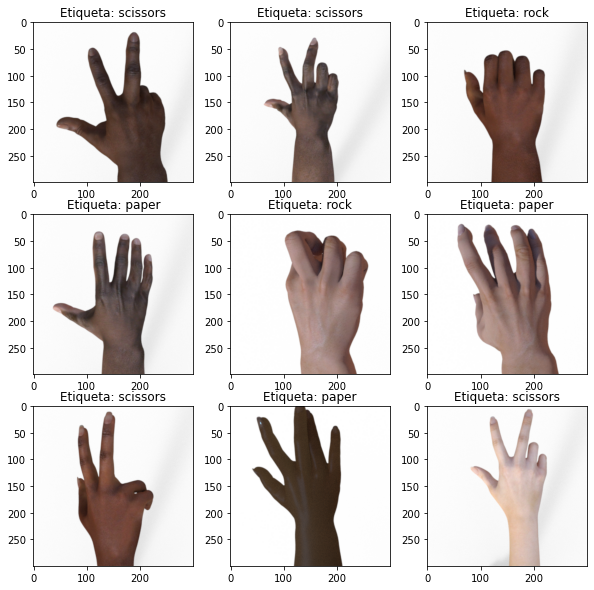

In [40]:
plt.figure(figsize=(10, 10))
indice = 0
ejemplos = entrenamiento_raw.take(9)
for e in ejemplos:
    imagenn, etiqueta = e
    indice += 1
    plt.subplot(3,3, indice)
    plt.title("Etiqueta: " + obtener_etiqueta(etiqueta.numpy()))
    plt.imshow(imagenn.numpy())

### Pre-procesamiento
Ahora que sabemos como son estas imagenes, vamos a optimizar estos datos para la red neuronal

In [41]:
def aplicar_formato(imagen, etiqueta):
    # Hago que el color sea un número entre 0 y 1.
    imagen = tf.cast(imagen, tf.float32) / 255
    # Cambio su tamaño a uno más pequeño
    imagen = tf.image.resize(imagen, [150, 150])
    return imagen, etiqueta

In [42]:
entrenamiento = entrenamiento_raw.map(aplicar_formato)
prueba = prueba_raw.map(aplicar_formato)

Ahora que unificamos el formato, vamos a aplicar distintos cambios aleatorios a las imagenes para prevenir el overfitting, osea evitar "sobreajustar" el modelo.

In [43]:
# Funciones para cambiar aleatoriamente ciertos aspectos
def rotar(imagen: tf.Tensor) -> tf.Tensor:
    imagen = tf.image.random_flip_left_right(imagen)
    imagen = tf.image.random_flip_up_down(imagen)
    return imagen

def cambiar_color(imagen: tf.Tensor) -> tf.Tensor:
    imagen = tf.image.random_hue(imagen, max_delta=0.08)
    imagen = tf.image.random_saturation(imagen, lower=0.7, upper=1.3)
    imagen = tf.image.random_brightness(imagen, 0.05)
    imagen = tf.image.random_contrast(imagen, lower=0.8, upper=1)
    imagen = tf.clip_by_value(imagen, clip_value_min=0, clip_value_max=1)
    return imagen

def rotar2(imagen: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        imagen,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

def invertir(imagen: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        imagen = tf.math.multiply(imagen, -1)
        imagen = tf.math.add(imagen, 1)
    return imagen

def ampliar(imagen: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    imagen_width, imagen_height, imagen_colors = imagen.shape
    crop_size = (imagen_width, imagen_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def cortar_aleatoriamente(img):
        # Create different crops for an imagen
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: imagen, lambda: cortar_aleatoriamente(imagen))

def mejorar_datos(imagen, label):
    imagen = rotar(imagen)
    imagen = cambiar_color(imagen)
    imagen = rotar2(imagen)
    imagen = ampliar(imagen)
    imagen = invertir(imagen)
    return imagen, label

In [44]:
entrenamiento_augmented = entrenamiento.map(mejorar_datos).map(mejorar_datos)

Volvemos a mostrar las imagenes, las de prueba quedan igual



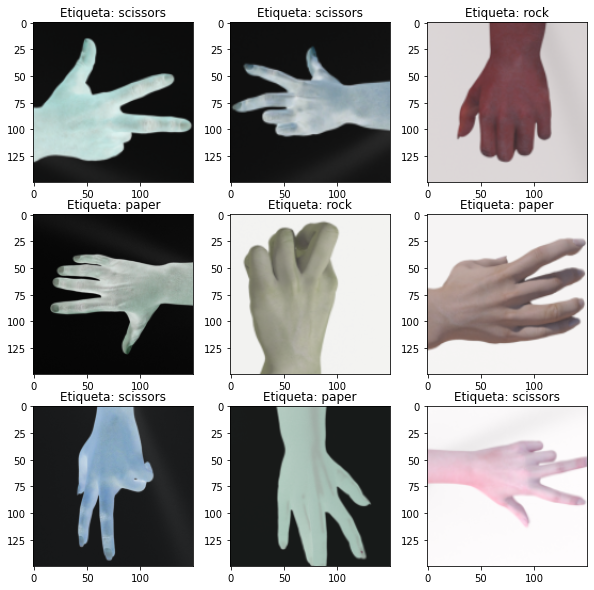

In [45]:
plt.figure(figsize=(10, 10))
indice = 0
ejemplos = entrenamiento_augmented.take(9)
for e in ejemplos:
    imagen, etiqueta = e
    indice += 1
    plt.subplot(3,3, indice)
    plt.title("Etiqueta: " + obtener_etiqueta(etiqueta.numpy()))
    plt.imshow(imagen.numpy())

Desordenamos los datos, para que la red no aprenda del orden de las imagenes.

In [46]:
TAMANIO_BATCH = 32
entrenamiento_desordenado = entrenamiento_augmented\
    .shuffle(buffer_size=TAMAÑO_DATOS_ENTRENAMIENTO)\
    .batch(TAMANIO_BATCH)\
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

prueba_desordenado = prueba.batch(TAMANIO_BATCH)

# Creamos el modelo y lo entrenamos

Para el modelo utilizaremos un conjunto de capas de los siguientes tipos:
* **Convoluciones**: recorre de a un subconjunto de píxeles de la imagen aplicando, multiplicandolos por una matriz que será un filtro.  
La idea es quedarse con determinadas características clave de la imagen en cuestión.
* **MaxPooling**: reduce la información obtenida luego de una convolución. Es decir de un conjunto de valores, se queda con el mayor. También se podría usar AvgPooling que toma el valor promedio.
* **Flatten**: Reordena las neuronas para que sean un array de una única dimensión.
* **Dense o fully_connected**: Son capas donde las neuronas se encuentran totalmente conectadas unas con otras. En estas se usa una función de activación segun el uso que se le de:  
 * ReLU: permite obtener solamente los valores cuando superan algún otro en particular. 
 * SoftMax: convierte a una probabilidad



In [47]:
model = tf.keras.models.Sequential()

pooling = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
)

model.add(tf.keras.layers.Convolution2D(
    input_shape=(150, 150, 3),
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(pooling)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.Dense(
    units=3,
    activation=tf.keras.activations.softmax
))

Guardamos una representación del modelo en la imagen "graph.png"

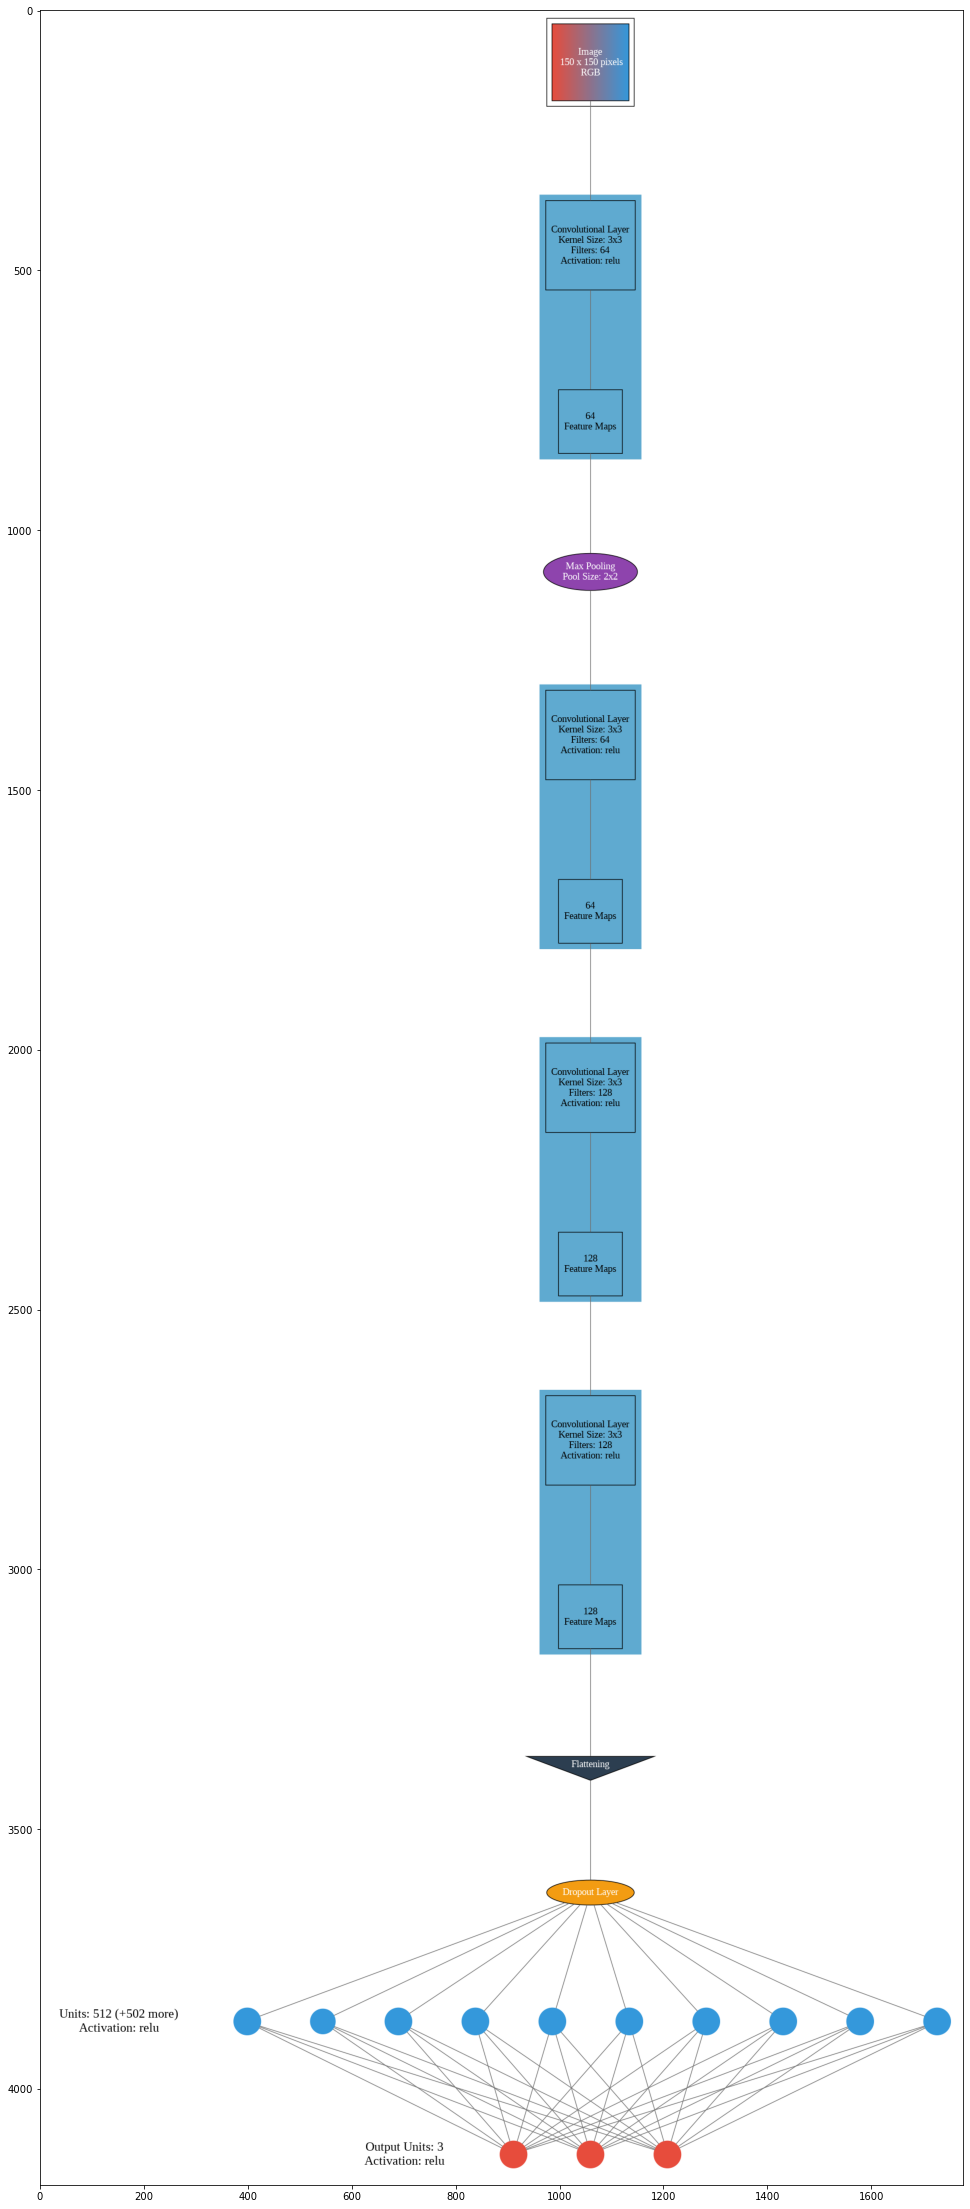

In [48]:
MOSTRAR_MODELO = True

visualizer(model, format='png', view=False)
image = plt.imread("graph.png")
plt.figure(figsize=(30,40))
if MOSTRAR_MODELO: plt.imshow(image)

In [49]:
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

steps_per_epoch = TAMAÑO_DATOS_ENTRENAMIENTO // TAMANIO_BATCH
validation_steps = TAMAÑO_DATOS_PRUEBA // TAMANIO_BATCH
epochs = 7

model.fit(
    x=entrenamiento_desordenado.repeat(),
    validation_data=prueba_desordenado.repeat(),
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/7


2021-12-13 23:03:28.300184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1131 of 2520
2021-12-13 23:03:38.304641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2263 of 2520
2021-12-13 23:03:40.563394: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 56s 431ms/step - loss: 1.1586 - accuracy: 0.4219 - val_loss: 0.9519 - val_accuracy: 0.5398
Epoch 2/7
 1/78 [..............................] - ETA: 24s - loss: 0.7774 - accuracy: 0.7083

2021-12-13 23:04:24.513684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1108 of 2520
2021-12-13 23:04:34.513357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2216 of 2520
2021-12-13 23:04:37.211327: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 56s 718ms/step - loss: 0.6882 - accuracy: 0.7154 - val_loss: 0.5953 - val_accuracy: 0.6477
Epoch 3/7
 2/78 [..............................] - ETA: 24s - loss: 0.5259 - accuracy: 0.8036

2021-12-13 23:05:20.579201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1140 of 2520
2021-12-13 23:05:30.587065: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2259 of 2520
2021-12-13 23:05:32.977795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 56s 716ms/step - loss: 0.4452 - accuracy: 0.8344 - val_loss: 0.5921 - val_accuracy: 0.6392
Epoch 4/7
 3/78 [>.............................] - ETA: 28s - loss: 0.3273 - accuracy: 0.9205

2021-12-13 23:06:16.539982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1125 of 2520
2021-12-13 23:06:26.537142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2251 of 2520
2021-12-13 23:06:28.896232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 55s 715ms/step - loss: 0.3145 - accuracy: 0.8907 - val_loss: 0.3533 - val_accuracy: 0.8097
Epoch 5/7
 4/78 [>.............................] - ETA: 27s - loss: 0.1548 - accuracy: 0.9250

2021-12-13 23:07:12.386937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1132 of 2520
2021-12-13 23:07:22.385340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2165 of 2520
2021-12-13 23:07:25.600880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 56s 726ms/step - loss: 0.2010 - accuracy: 0.9289 - val_loss: 0.4002 - val_accuracy: 0.8494
Epoch 6/7
 5/78 [>.............................] - ETA: 29s - loss: 0.1493 - accuracy: 0.9408

2021-12-13 23:08:09.211067: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1083 of 2520
2021-12-13 23:08:19.216148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2200 of 2520
2021-12-13 23:08:22.194165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 57s 730ms/step - loss: 0.1819 - accuracy: 0.9421 - val_loss: 0.2825 - val_accuracy: 0.8551
Epoch 7/7
 6/78 [=>............................] - ETA: 29s - loss: 0.1997 - accuracy: 0.9185

2021-12-13 23:09:06.280313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1095 of 2520
2021-12-13 23:09:16.292063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2193 of 2520
2021-12-13 23:09:19.247026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


78/78 [==============================] - 56s 724ms/step - loss: 0.1526 - accuracy: 0.9482 - val_loss: 0.1943 - val_accuracy: 0.9205


In [54]:
print(entrenamiento_desordenado)
print(prueba_desordenado)

<PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>
<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>


In [51]:
nombre_salida = 'piedra_papel_o_tijera.h5'
model.save(nombre_salida, save_format='h5')

In [53]:
_, precision_entrenamiento = model.evaluate(
    x=entrenamiento.batch(TAMANIO_BATCH).take(TAMAÑO_DATOS_ENTRENAMIENTO )
)

_, precision_prueba = model.evaluate(
    x=prueba.batch(TAMANIO_BATCH).take(TAMAÑO_DATOS_PRUEBA)
)
print('\n')
print('Presición en los datos de entrenamiento: ', precision_entrenamiento)
print('Presición en los datos de prueba: ', precision_prueba)

12/12 [==============================] - 1s 83ms/step - loss: 0.1882 - accuracy: 0.9220


Presición en los datos de entrenamiento:  0.9932539463043213
Presición en los datos de prueba:  0.9220430254936218


In [55]:
imagenes = []
rutas = ['ejemplos/papel.jpeg', 'ejemplos/piedra.jpeg','ejemplos/tijera.jpeg']
respuestas = ['paper', 'rock', 'scissors']
for ruta in rutas:
    imagen = plt.imread(ruta,0)
    formateada =aplicar_formato(imagen, ".")[0]
    imagenes.append(formateada)

X = np.array(imagenes).astype('float32')

In [56]:
predicciones = model.predict(X)
for i in range(len(predicciones)): 
    prediccion = list(predicciones[i])
    elegido = obtener_etiqueta(prediccion.index(max(prediccion)))
    if elegido == respuestas[i]:
        print(f"La predicción [{elegido}] para la imagen {rutas[i]}, fue correcta!")
    else:
        print(f"La predicción [{elegido}] para la imagen {rutas[i]}, fue incorrecta. Esperado {respuestas[i]}")

La predicción [rock] para la imagen ejemplos/papel.jpeg, fue incorrecta. Esperado paper
La predicción [rock] para la imagen ejemplos/piedra.jpeg, fue correcta!
La predicción [scissors] para la imagen ejemplos/tijera.jpeg, fue correcta!


Y con esto lograriamos que este segundo modelo generace jugadas apartir de imagenes para jugar contra el primero. Si bien puede verse que las respuestas no son perfectas, en un futuro con unos sets mas amplios podran mejorarse.

Por si se quiere replicar, dejamos el link a las imagenes usadas arriba aqui

No son mas que 3 imagenes nuestras haciendo los movimientos, para tratar que el modelo las diferencie.

https://ibb.co/VjWgjT8

https://ibb.co/d4mHCcn

https://ibb.co/GtRWYJq

Una vez descargadas, se suben al colab y van a permitir la ante ultima y ultima celda para ejecutar